In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read excel
def read_excel(path, sheet_name):
    df = pd.read_excel(path, sheet_name=sheet_name)
    return df

def draw_hex_contour(data, xindex, yindex):
    # Creating a hexbin plot with contours
    plt.close("all")
    plt.figure(figsize=(8, 6))

    # Create the hexbin plot
    hb = plt.hexbin(data[xindex], data[yindex], gridsize=30, cmap='Blues', mincnt=1)

    # Adding a color bar
    cb = plt.colorbar(hb)
    cb.set_label('Counts')

    # Adding titles and labels
    plt.title('Hexbin Contour Plot')
    plt.xlabel(xindex)
    plt.ylabel(yindex)
    plt.show()
    


In [3]:
df = read_excel("~/Desktop/Data_Collection.xlsx", "data1")

In [4]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,Data,Cement (kg/m3),Water (kg/m3),Fine Aggregate (kg/m3),Coarse Aggregate (kg/m3),HRWR (kg/m3),Fly ash (kg/m3),Slag (kg/m3),Rice Husk Ash (kg/m3),...,nano-TiO2 (kg/m3),nano-SiO2 (kg/m3),nano-Al2O3 (kg/m3),Concrete Age (days),Curing Temperature (degC),Compressive Strength (Mpa) 100mm cubes,Compressive Strength (Mpa) 150mm cubes,Compressive Strength (Mpa) 4*8'' cylinders,Compressive Strength (Mpa) 150*300mm cylinders,Compressive Strength (Mpa) 150mm cubes_calcuate
1,(2012) Use of nano-silica to reduce setting ti...,0,200,180,774,1014,1.4,0,200,0,...,0,0,0,3,30,35.4,35.834,29.1696,NaN,35.834
2,NaN,1,200,180,771,1014,1.7,0,192,0,...,0,0,0,3,30,36.7,37.017,30.2408,NaN,37.017
3,NaN,2,200,180,771,1014,4,0,192,0,...,0,8,0,3,30,43.1,42.841,35.5144,NaN,42.841
4,NaN,3,200,180,774,1014,1.4,0,200,0,...,0,0,0,7,30,48.1,47.391,39.6344,NaN,47.391


In [5]:
# get columns names
column_names = list(df.iloc[0])[1:]
index_names = list(df.iloc[1:, 1])
print(column_names)

['Data', 'Cement (kg/m3)', 'Water (kg/m3)', 'Fine Aggregate (kg/m3)', 'Coarse Aggregate (kg/m3)', 'HRWR (kg/m3)', 'Fly ash (kg/m3)', 'Slag (kg/m3)', 'Rice Husk Ash (kg/m3)', 'Silica Fume (kg/m3)', 'nano-TiO2 (kg/m3)', 'nano-SiO2 (kg/m3)', 'nano-Al2O3 (kg/m3)', 'Concrete Age (days)', 'Curing Temperature (degC)', 'Compressive Strength (Mpa) 100mm cubes', 'Compressive Strength (Mpa) 150mm cubes', "Compressive Strength (Mpa) 4*8'' cylinders", 'Compressive Strength (Mpa) 150*300mm cylinders', 'Compressive Strength (Mpa) 150mm cubes_calcuate']


In [6]:
values = df.iloc[1:, 1:].to_numpy()
values

array([[0, 200, 180, ..., 29.1696, nan, 35.834],
       [1, 200, 180, ..., 30.2408, nan, 37.017],
       [2, 200, 180, ..., 35.5144, nan, 42.841],
       ...,
       [216, 306.25, 168, ..., 54.34, nan, 60.75],
       [217, 375.305, 168, ..., 53.11, nan, 59.52],
       [218, 304.5, 168, ..., 52.12, nan, 58.53]], dtype=object)

In [7]:
y1 = values[:, 15]
y2 = values[:, 16]
y3 = values[:, 17]
print(y1)
print(y2)
print(y3)
# y3 = []
# for a,b in zip(y1, y2):
#     if np.isnan(b):
#         y3.append(a * 0.91 + 3.62)
#     else:
#         y3.append(b)
# print(y3)
# values[:, 16] = y3

[35.4 36.7 43.1 48.1 50.5 56.8 68 68.4 69.8 69.3 69.7 71.1 19.5 20.4 25.3
 28.1 29.9 35 43 43.5 48.7 50.2 51.9 59.3 nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 27.9 25.3 28.2 32.8 37.7 34.1 36.2 37.8 39.8 43.4 49.2 45.1 44.3 47.9
 48.2 50.2 52.4 50.7 nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan 27 32 31 34.67 40 38.33 47.5 53 51.33 52.7 58 56 31
 33 32.17 38 46.67 45 51 55.67 54 56 60.67 58 31 28 38 35.3 50.8 48.5 55
 53.7 33 32 40 38.5 53.5 51.5 58.67 56.5 nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan]
[35.834 37.017 42.841 47.391 49.575 55.308 65.5 65.864 67.138 66.683
 

In [8]:
x = values[:, :14]

In [14]:
y = values[:, [-1]]

In [15]:
y

array([[35.834],
       [37.017],
       [42.841],
       [47.391],
       [49.575],
       [55.308],
       [65.5],
       [65.864],
       [67.138],
       [66.683],
       [67.047],
       [68.321],
       [21.365],
       [22.184],
       [26.643],
       [29.191],
       [30.829],
       [35.47],
       [42.75],
       [43.205],
       [47.937],
       [49.302],
       [50.849],
       [57.583],
       [47.5],
       [44],
       [40.5],
       [16.8],
       [30.4],
       [51.2],
       [27.6],
       [43.9],
       [66.8],
       [35],
       [59],
       [81.1],
       [54.4],
       [75.8],
       [87.9],
       [71.6],
       [85],
       [91.2],
       [85.7],
       [92.2],
       [96.3],
       [95.4],
       [104.5],
       [103.7],
       [108.5],
       [115.9],
       [29.009],
       [26.643],
       [29.282],
       [33.468],
       [37.927],
       [34.651],
       [36.562],
       [38.018],
       [39.838],
       [43.114],
       [48.392],
       [44.661],
      

In [9]:
used_columns = column_names[1:15] + [column_names[-1]]
print(used_columns)
new_df = pd.DataFrame(values[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,19]], columns=used_columns, index=index_names)
new_df

['Cement (kg/m3)', 'Water (kg/m3)', 'Fine Aggregate (kg/m3)', 'Coarse Aggregate (kg/m3)', 'HRWR (kg/m3)', 'Fly ash (kg/m3)', 'Slag (kg/m3)', 'Rice Husk Ash (kg/m3)', 'Silica Fume (kg/m3)', 'nano-TiO2 (kg/m3)', 'nano-SiO2 (kg/m3)', 'nano-Al2O3 (kg/m3)', 'Concrete Age (days)', 'Curing Temperature (degC)', 'Compressive Strength (Mpa) 150mm cubes_calcuate']


,Cement (kg/m3),Water (kg/m3),Fine Aggregate (kg/m3),Coarse Aggregate (kg/m3),HRWR (kg/m3),Fly ash (kg/m3),Slag (kg/m3),Rice Husk Ash (kg/m3),Silica Fume (kg/m3),nano-TiO2 (kg/m3),nano-SiO2 (kg/m3),nano-Al2O3 (kg/m3),Concrete Age (days),Curing Temperature (degC),Compressive Strength (Mpa) 150mm cubes_calcuate
0,200,180,774,1014,1.4,0,200,0,0,0,0,0,3,30,35.834
1,200,180,771,1014,1.7,0,192,0,8,0,0,0,3,30,37.017
2,200,180,771,1014,4,0,192,0,0,0,8,0,3,30,42.841
3,200,180,774,1014,1.4,0,200,0,0,0,0,0,7,30,47.391
4,200,180,771,1014,1.7,0,192,0,8,0,0,0,7,30,49.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,308,168,960,920,4.12,0,0,0,35,0,0,7,90,20,56.53
215,307.125,168,960,920,4.45,0,0,0,35,0,0,7.875,90,20,57.64
216,306.25,168,960,920,4.89,0,0,0,35,0,0,8.75,90,20,60.75
217,375.305,168,960,920,4.92,0,0,0,35,0,0,9.625,90,20,59.52


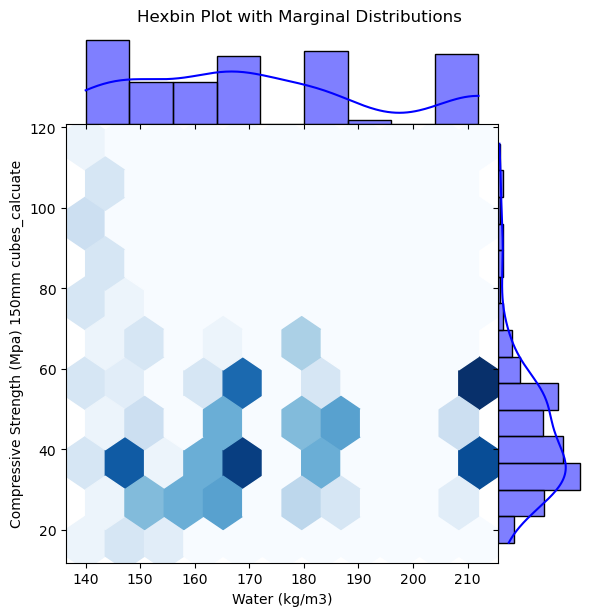

In [10]:
# draw hex_contour
def draw_hex_contour_marginal_dis(data, xindex, yindex):
    # Create the hexbin plot with marginal distributions
    g = sns.JointGrid(data=data, x=xindex, y=yindex, space=0)

    # Add the hexbin plot to the center
    g.plot_joint(plt.hexbin, gridsize=10, cmap='Blues')

    # Add the marginal histograms to the sides
#     g.plot_marginals(sns.histplot, kde=True, color="blue", bins=np.linspace(100,201, num=30))
    g.plot_marginals(sns.histplot, kde=True, color="blue")


    # Adding labels and title
    g.set_axis_labels(xindex, yindex)
    plt.suptitle("Hexbin Plot with Marginal Distributions", y=1.02)

    # Show the plot
    plt.show()

draw_hex_contour_marginal_dis(new_df, 'Water (kg/m3)', "Compressive Strength (Mpa) 150mm cubes_calcuate")

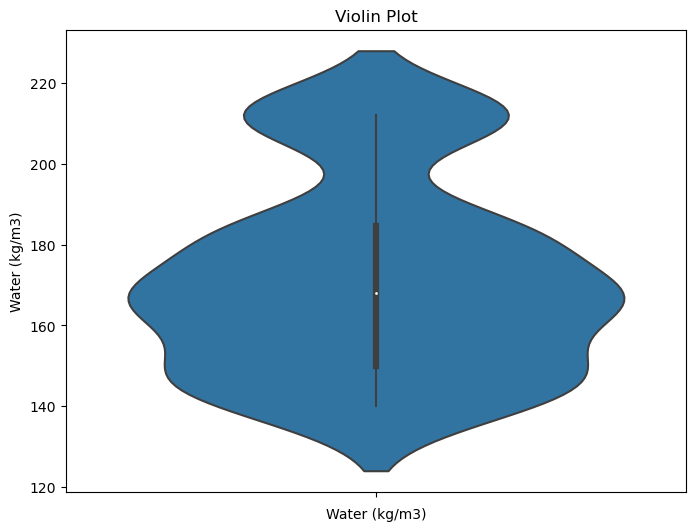

In [11]:
def draw_violin(data, xindex, yindex):
    # Create a violin plot
    plt.close("all")
    plt.figure(figsize=(8, 6))
    new_data = data.fillna(0)
    sns.violinplot(data=new_data, y=xindex)

    # Adding title and labels
    plt.title("Violin Plot")
    plt.xlabel(xindex)
#     plt.ylabel(yindex)
    
draw_violin(new_df, 'Water (kg/m3)', "Compressive Strength (Mpa) 150mm cubes_calcuate")

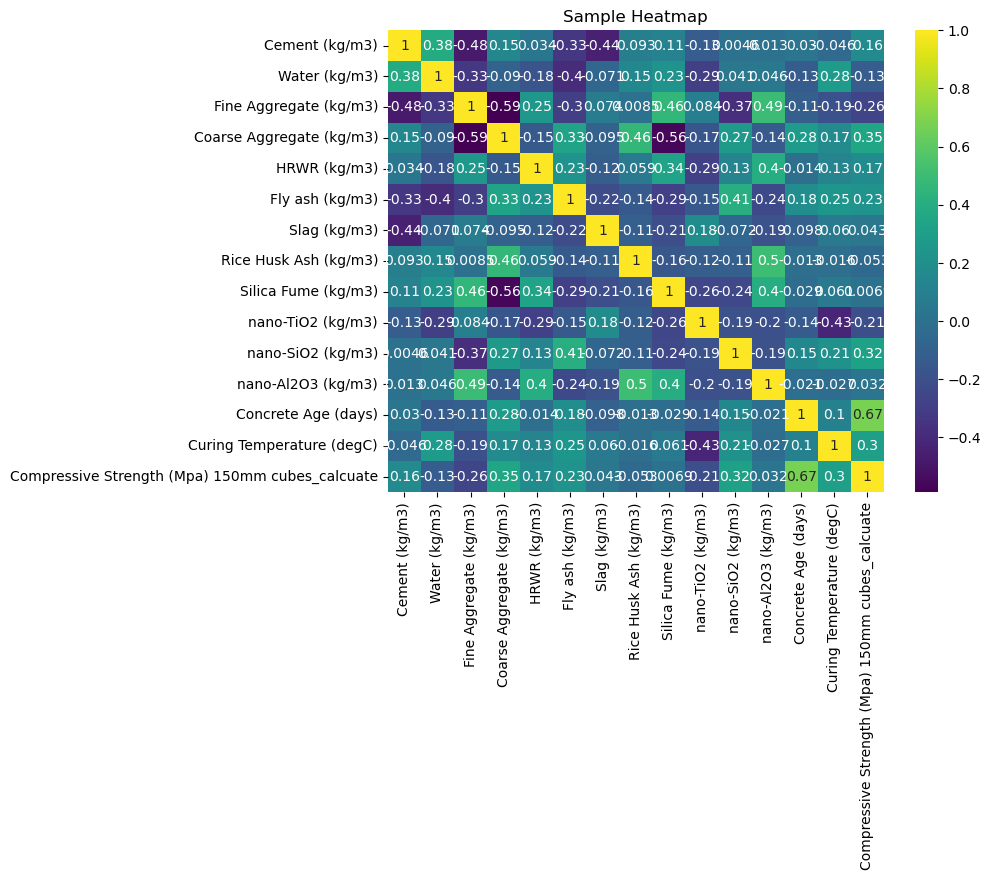

In [12]:
def draw_heatmap(data, xindex, yindex):
    # Create the heatmap
    new_data = data.fillna(0)
    corr_matrix = new_data.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="viridis")

    # Adding title and labels
    plt.title("Sample Heatmap")
#     plt.xlabel(xindex)
#     plt.ylabel(yindex)

draw_heatmap(new_df, 'Water (kg/m3)', "Compressive Strength (Mpa) 150mm cubes_calcuate")

In [45]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

## cross validation 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.1, random_state=43)
X_train3, X_test3, y_train3, y_test3 = train_test_split(x, y, test_size=0.1, random_state=44)
X_train4, X_test4, y_train4, y_test4 = train_test_split(x, y, test_size=0.1, random_state=45)
X_train5, X_test5, y_train5, y_test5 = train_test_split(x, y, test_size=0.1, random_state=46)


In [47]:
from sklearn.metrics import r2_score

def calculate_rmse(actual, predicted):
    # Ensure the inputs are numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Calculate the RMSE
    rmse = np.sqrt(np.mean((actual - predicted) ** 2))
    return rmse

def calculate_rmae(actual, predicted):
    # Ensure the inputs are numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Calculate the RMAE
    rmae = np.sqrt(np.mean(np.abs(actual - predicted)))
    return rmae

def calculate_r2(actual, predicted):
    # Ensure the inputs are numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Calculate the total sum of squares (SST) and residual sum of squares (SSR)
    ss_total = np.sum((actual - np.mean(actual)) ** 2)
    ss_residual = np.sum((actual - predicted) ** 2)
    
    # Calculate R2
    r2 = 1 - (ss_residual / ss_total)
    return r2

def calculate_adjusted_r2(actual, predicted, num_predictors):
    # Ensure the inputs are numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Calculate the total sum of squares (SST) and residual sum of squares (SSR)
    ss_total = np.sum((actual - np.mean(actual)) ** 2)
    ss_residual = np.sum((actual - predicted) ** 2)
    
    # Calculate R2
    r2 = 1 - (ss_residual / ss_total)
    
    # Calculate Adjusted R2
    n = len(actual)  # Number of observations
    adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - num_predictors - 1)
    
    return adjusted_r2

reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

print("ridge regression for cross validation 1")
print("rmse: ", calculate_rmse(y_test, pred))
print("rmae: ", calculate_rmae(y_test, pred))
print("R2: ", r2_score(y_test, pred))
print()

reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train2, y_train2)
pred = reg.predict(X_test2)

print("ridge regression for cross validation 2")
print("rmse: ", calculate_rmse(y_test2, pred))
print("rmae: ", calculate_rmae(y_test2, pred))
print("R2: ", r2_score(y_test2, pred))
print()

reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train3, y_train3)
pred = reg.predict(X_test3)

print("ridge regression for cross validation 3")
print("rmse: ", calculate_rmse(y_test3, pred))
print("rmae: ", calculate_rmae(y_test3, pred))
print("R2: ", r2_score(y_test3, pred))
print()

reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train4, y_train4)
pred = reg.predict(X_test4)

print("ridge regression for cross validation 4")
print("rmse: ", calculate_rmse(y_test4, pred))
print("rmae: ", calculate_rmae(y_test4, pred))
print("R2: ", r2_score(y_test4, pred))
print()

reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train5, y_train5)
pred = reg.predict(X_test5)

print("ridge regression for cross validation 5")
print("rmse: ", calculate_rmse(y_test5, pred))
print("rmae: ", calculate_rmae(y_test5, pred))
print("R2: ", r2_score(y_test5, pred))
print()


ridge regression for cross validation 1
rmse:  9.258032609399844
rmae:  2.6110604158081427
R2:  0.49173329613395844

ridge regression for cross validation 2
rmse:  8.077246013965587
rmae:  2.570228754835191
R2:  0.5398608892168598

ridge regression for cross validation 3
rmse:  10.40801025302113
rmae:  2.7660785236842864
R2:  0.8296723143205817

ridge regression for cross validation 4
rmse:  10.205738241990188
rmae:  2.598656276375602
R2:  0.6959379809066124

ridge regression for cross validation 5
rmse:  8.449032037526322
rmae:  2.454027653426798
R2:  0.8138382662808992



In [49]:
from sklearn import linear_model

reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

print("lasso regression for cross validation 1")
print("rmse: ", calculate_rmse(y_test, pred))
print("rmae: ", calculate_rmae(y_test, pred))
print("R2: ", r2_score(y_test, pred))
print()

reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train2, y_train2)
pred = reg.predict(X_test2)

print("lasso regression for cross validation 2")
print("rmse: ", calculate_rmse(y_test2, pred))
print("rmae: ", calculate_rmae(y_test2, pred))
print("R2: ", r2_score(y_test2, pred))
print()

reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train3, y_train3)
pred = reg.predict(X_test3)

print("lasso regression for cross validation 3")
print("rmse: ", calculate_rmse(y_test3, pred))
print("rmae: ", calculate_rmae(y_test3, pred))
print("R2: ", r2_score(y_test3, pred))
print()

reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train4, y_train4)
pred = reg.predict(X_test4)

print("lasso regression for cross validation 4")
print("rmse: ", calculate_rmse(y_test4, pred))
print("rmae: ", calculate_rmae(y_test4, pred))
print("R2: ", r2_score(y_test4, pred))
print()

reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train5, y_train5)
pred = reg.predict(X_test5)

print("lasso regression for cross validation 5")
print("rmse: ", calculate_rmse(y_test5, pred))
print("rmae: ", calculate_rmae(y_test5, pred))
print("R2: ", r2_score(y_test5, pred))
print()


lasso regression for cross validation 1
rmse:  16.110937019010713
rmae:  3.6231608981142656
R2:  0.49503471451700043

lasso regression for cross validation 2
rmse:  14.7701179500052
rmae:  3.4758725875841052
R2:  0.534190497112969

lasso regression for cross validation 3
rmse:  34.28879765966719
rmae:  5.013477892034781
R2:  0.8287624312599878

lasso regression for cross validation 4
rmse:  22.537473198876654
rmae:  4.032337033740991
R2:  0.694083300349171

lasso regression for cross validation 5
rmse:  27.581211215929702
rmae:  4.379359869509623
R2:  0.8166567918279596



In [122]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)
pred = tree_regressor.predict(X_test)

print("decision tree for cross validation 1")
print("rmse: ", calculate_rmse(y_test, pred))
print("rmae: ", calculate_rmae(y_test, pred))
print("R2: ", r2_score(y_test, pred))
print()

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train2, y_train2)
pred = tree_regressor.predict(X_test2)

print("decision tree for cross validation 2")
print("rmse: ", calculate_rmse(y_test2, pred))
print("rmae: ", calculate_rmae(y_test2, pred))
print("R2: ", r2_score(y_test2, pred))
print()

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train3, y_train3)
pred = tree_regressor.predict(X_test3)

print("decision tree for cross validation 3")
print("rmse: ", calculate_rmse(y_test3, pred))
print("rmae: ", calculate_rmae(y_test3, pred))
print("R2: ", r2_score(y_test3, pred))
print()

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train4, y_train4)
pred = tree_regressor.predict(X_test4)

print("decision tree for cross validation 4")
print("rmse: ", calculate_rmse(y_test4, pred))
print("rmae: ", calculate_rmae(y_test4, pred))
print("R2: ", r2_score(y_test4, pred))
print()

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train5, y_train5)
pred = tree_regressor.predict(X_test5)

print("decision tree for cross validation 5")
print("rmse: ", calculate_rmse(y_test5, pred))
print("rmae: ", calculate_rmae(y_test5, pred))
print("R2: ", r2_score(y_test5, pred))
print()


decision tree for cross validation 1
rmse:  18.203628912956273
rmae:  3.850281602666839
R2:  0.8385722004400648

decision tree for cross validation 2
rmse:  16.78251140489027
rmae:  3.639892818828873
R2:  0.6753354599197996

decision tree for cross validation 3
rmse:  35.37628666053888
rmae:  5.194171038038376
R2:  0.916318417857403

decision tree for cross validation 4
rmse:  24.858778139877195
rmae:  4.263809497860989
R2:  0.9558214068377009

decision tree for cross validation 5
rmse:  27.67237339920246
rmae:  4.521576499280197
R2:  0.9396191191702056



In [52]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        """
        input_size: Number of input features
        hidden_sizes: List containing the sizes of each hidden layer
        output_size: Number of output features
        """
        super(MLP, self).__init__()
        
        # Define the first layer from input to first hidden layer
        layers = [nn.Linear(input_size, hidden_sizes[0])]
        
        # Create the hidden layers dynamically based on hidden_sizes
        for i in range(1, len(hidden_sizes)):
            layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
        
        # Append the final layer that maps the last hidden layer to the output
        layers.append(nn.Linear(hidden_sizes[-1], output_size))
        
        # Store the layers in an nn.ModuleList
        self.layers = nn.ModuleList(layers)

    def forward(self, x):
        # Pass the input through each layer, applying ReLU after each layer except the output
        for i in range(len(self.layers) - 1):
            x = F.relu(self.layers[i](x))
        
        # Output layer (without activation, useful for regression)
        x = self.layers[-1](x)
        
        return x

In [92]:
input_size = X_train.shape[1]
hidden_sizes = [32, 128, 128]
output_size = 1
model = MLP(input_size, hidden_sizes, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.train()
for epoch in range(1000):
    output = model(torch.from_numpy(X_train.astype(np.float32)))
    loss = criterion(output, torch.from_numpy(y_train.astype(np.float32)))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
y_pred = model(torch.from_numpy(X_test.astype(np.float32)))

print("ANN for cross validation 1")
print("rmse: ", calculate_rmse(y_test, y_pred.detach().numpy()))
print("rmae: ", calculate_rmae(y_test, y_pred.detach().numpy()))
print("R2: ", r2_score(y_test, y_pred.detach().numpy()))
print()

ANN for cross validation 1
rmse:  5.675419775369586
rmae:  2.1449923747053665
R2:  0.8089925853698413



In [93]:
input_size = X_train.shape[1]
hidden_sizes = [32, 128, 128]
output_size = 1
model = MLP(input_size, hidden_sizes, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.train()
for epoch in range(1000):
    output = model(torch.from_numpy(X_train2.astype(np.float32)))
    loss = criterion(output, torch.from_numpy(y_train2.astype(np.float32)))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
y_pred = model(torch.from_numpy(X_test2.astype(np.float32)))

print("ANN for cross validation 2")
print("rmse: ", calculate_rmse(y_test2, y_pred.detach().numpy()))
print("rmae: ", calculate_rmae(y_test2, y_pred.detach().numpy()))
print("R2: ", r2_score(y_test2, y_pred.detach().numpy()))
print()

ANN for cross validation 2
rmse:  6.792198046553543
rmae:  2.443796849288767
R2:  0.6746257285778812



In [94]:
input_size = X_train.shape[1]
hidden_sizes = [32, 128, 128]
output_size = 1
model = MLP(input_size, hidden_sizes, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.train()
for epoch in range(1000):
    output = model(torch.from_numpy(X_train3.astype(np.float32)))
    loss = criterion(output, torch.from_numpy(y_train3.astype(np.float32)))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
y_pred = model(torch.from_numpy(X_test3.astype(np.float32)))


print("ANN for cross validation 3")
print("rmse: ", calculate_rmse(y_test3, y_pred.detach().numpy()))
print("rmae: ", calculate_rmae(y_test3, y_pred.detach().numpy()))
print("R2: ", r2_score(y_test3, y_pred.detach().numpy()))
print()

ANN for cross validation 3
rmse:  3.537102614922616
rmae:  1.6117894715956627
R2:  0.9803281528456806



In [95]:
input_size = X_train.shape[1]
hidden_sizes = [32, 128, 128]
output_size = 1
model = MLP(input_size, hidden_sizes, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.train()
for epoch in range(1000):
    output = model(torch.from_numpy(X_train4.astype(np.float32)))
    loss = criterion(output, torch.from_numpy(y_train4.astype(np.float32)))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
y_pred = model(torch.from_numpy(X_test4.astype(np.float32)))


print("ANN for cross validation 4")
print("rmse: ", calculate_rmse(y_test4, y_pred.detach().numpy()))
print("rmae: ", calculate_rmae(y_test4, y_pred.detach().numpy()))
print("R2: ", r2_score(y_test4, y_pred.detach().numpy()))
print()

ANN for cross validation 4
rmse:  4.407197455266686
rmae:  1.8490043624254346
R2:  0.943298004698315



In [96]:
input_size = X_train.shape[1]
hidden_sizes = [32, 128, 128]
output_size = 1
model = MLP(input_size, hidden_sizes, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.train()
for epoch in range(1000):
    output = model(torch.from_numpy(X_train5.astype(np.float32)))
    loss = criterion(output, torch.from_numpy(y_train5.astype(np.float32)))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
y_pred = model(torch.from_numpy(X_test5.astype(np.float32)))

print("ANN for cross validation 5")
print("rmse: ", calculate_rmse(y_test5, y_pred.detach().numpy()))
print("rmae: ", calculate_rmae(y_test5, y_pred.detach().numpy()))
print("R2: ", r2_score(y_test5, y_pred.detach().numpy()))
print()

ANN for cross validation 5
rmse:  4.391789909289022
rmae:  1.8840557362242458
R2:  0.9497009695112487



In [97]:
!pip install captum

In [98]:
from captum.attr import IntegratedGradients
import matplotlib.pyplot as plt

(197, 14)
IG Attributions: torch.Size([197, 14])
Convergence Delta: torch.Size([197])


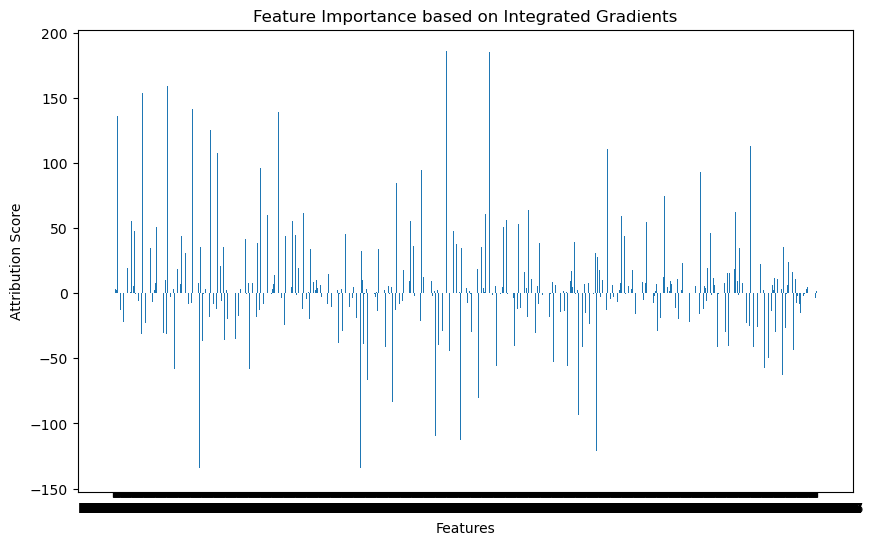

In [110]:
ig = IntegratedGradients(model)
print(X_train.shape)
baseline = torch.zeros_like(torch.from_numpy(X_train.astype(np.float32)))
attributions, delta = ig.attribute(torch.from_numpy(X_train.astype(np.float32)), baseline, target=0, return_convergence_delta=True)
print('IG Attributions:', attributions.shape)
print('Convergence Delta:', delta.shape)

# Visualize the attributions using a bar plot
def visualize_attributions(attributions):
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(attributions)), attributions, tick_label=[f'Feature {i}' for i in range(len(attributions))])
    plt.xlabel('Features')
    plt.ylabel('Attribution Score')
    plt.title('Feature Importance based on Integrated Gradients')
    plt.show()

attributions = attributions.detach().numpy().flatten()
visualize_attributions(attributions)

In [111]:
# imports from captum library
from captum.attr import LayerConductance, LayerActivation, LayerIntegratedGradients
from captum.attr import IntegratedGradients, DeepLift, GradientShap, NoiseTunnel, FeatureAblation

ig = IntegratedGradients(model)
ig_nt = NoiseTunnel(ig)
dl = DeepLift(model)
gs = GradientShap(model)
fa = FeatureAblation(model)

In [114]:
X_train_tensor = torch.from_numpy(X_train.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))

ig_attr_test = ig.attribute(X_test_tensor, n_steps=50)
ig_nt_attr_test = ig_nt.attribute(X_test_tensor)
dl_attr_test = dl.attribute(X_test_tensor)
gs_attr_test = gs.attribute(X_test_tensor, X_train_tensor)
fa_attr_test = fa.attribute(X_test_tensor)

/home/tony/anaconda3/lib/python3.11/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
/home/tony/anaconda3/lib/python3.11/site-packages/captum/attr/_core/deep_lift.py:304: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(


14


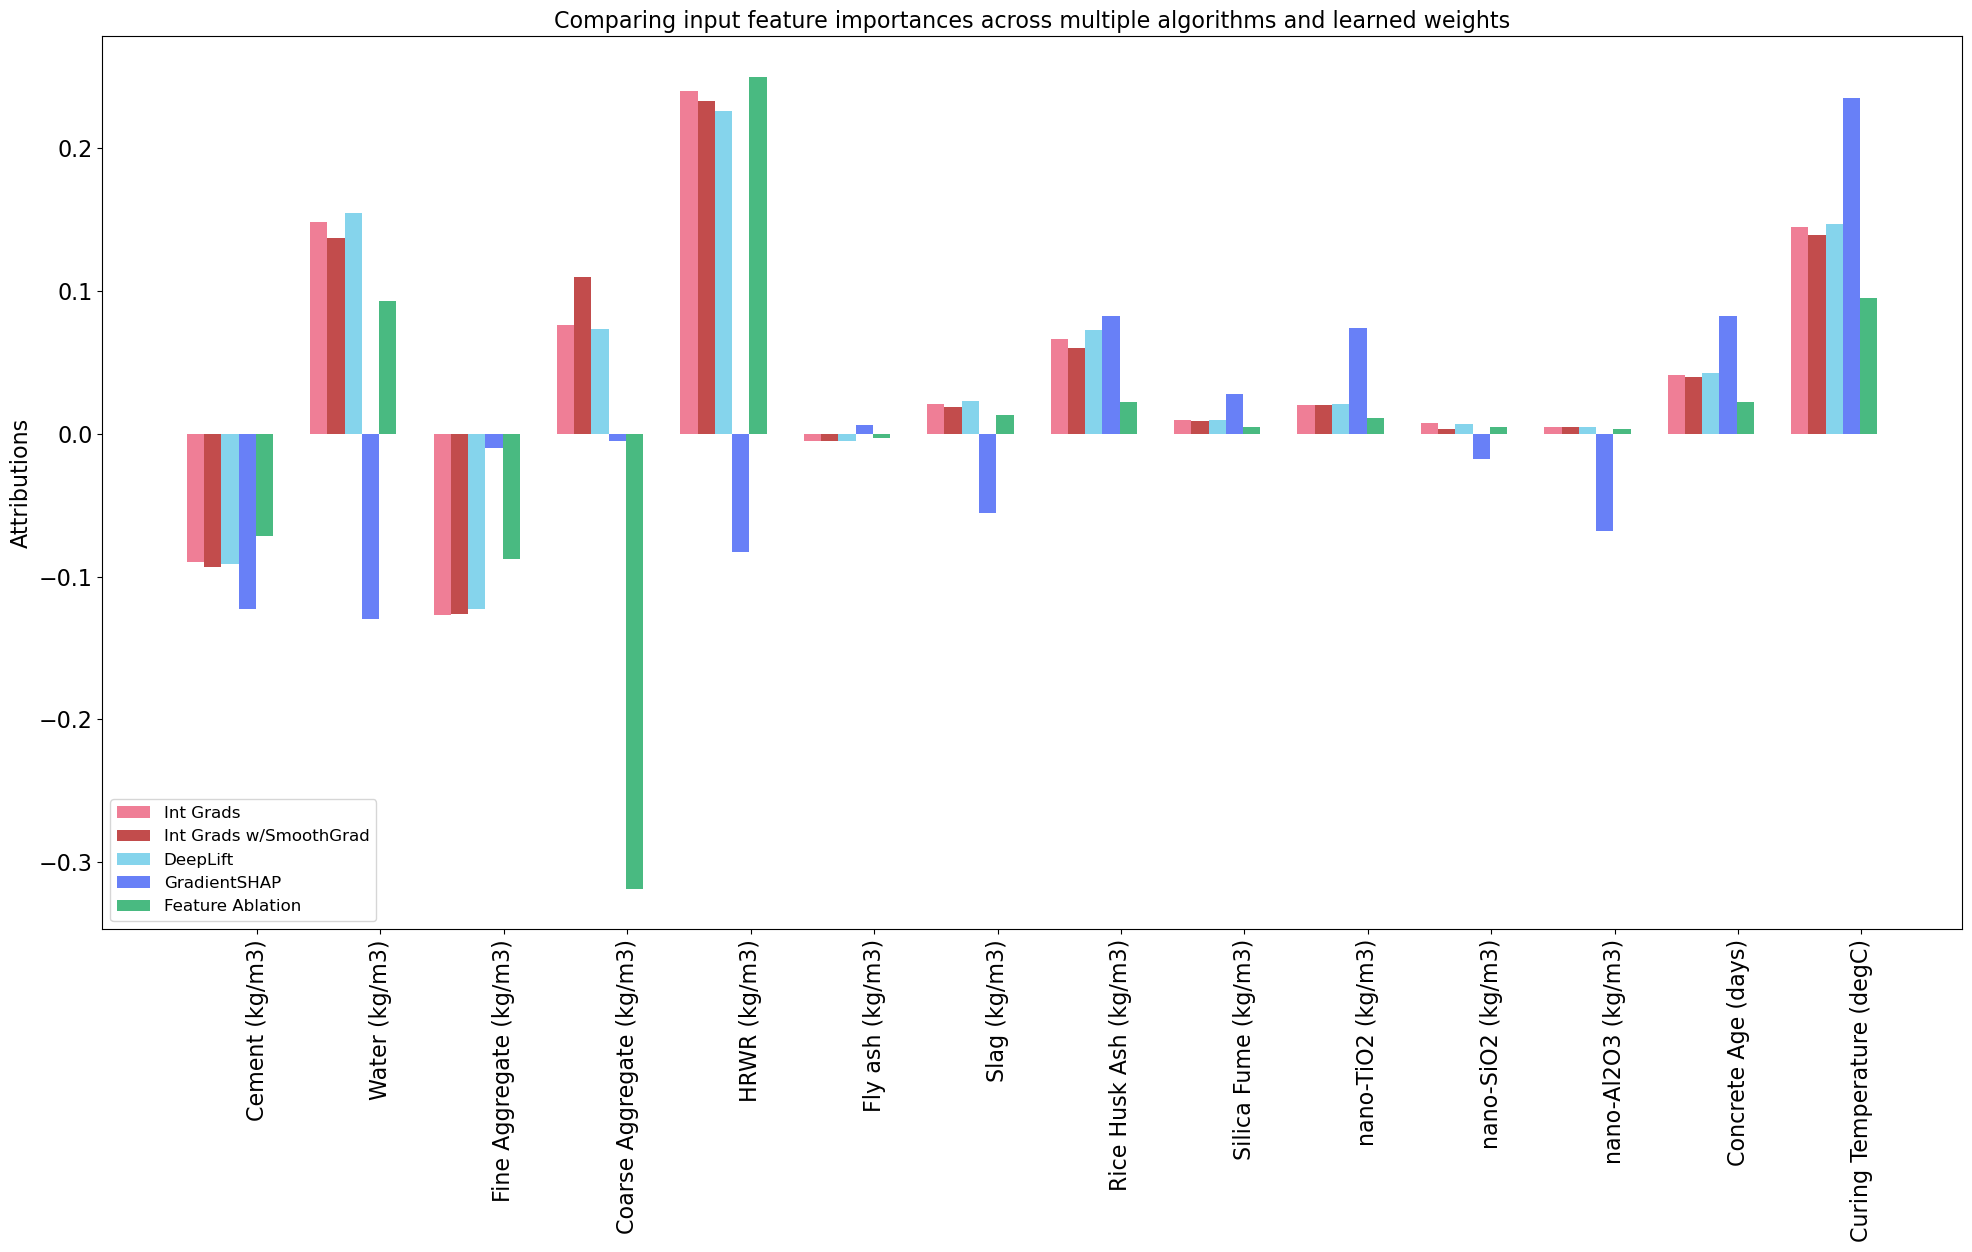

In [120]:
# prepare attributions for visualization
feature_names = column_names[1:15]
print(len(feature_names))

x_axis_data = np.arange(X_test.shape[1])
x_axis_data_labels = list(map(lambda idx: feature_names[idx], x_axis_data))

ig_attr_test_sum = ig_attr_test.detach().numpy().sum(0)
ig_attr_test_norm_sum = ig_attr_test_sum / np.linalg.norm(ig_attr_test_sum, ord=1)

ig_nt_attr_test_sum = ig_nt_attr_test.detach().numpy().sum(0)
ig_nt_attr_test_norm_sum = ig_nt_attr_test_sum / np.linalg.norm(ig_nt_attr_test_sum, ord=1)

dl_attr_test_sum = dl_attr_test.detach().numpy().sum(0)
dl_attr_test_norm_sum = dl_attr_test_sum / np.linalg.norm(dl_attr_test_sum, ord=1)

gs_attr_test_sum = gs_attr_test.detach().numpy().sum(0)
gs_attr_test_norm_sum = gs_attr_test_sum / np.linalg.norm(gs_attr_test_sum, ord=1)

fa_attr_test_sum = fa_attr_test.detach().numpy().sum(0)
fa_attr_test_norm_sum = fa_attr_test_sum / np.linalg.norm(fa_attr_test_sum, ord=1)

# lin_weight = model.Linear.weight[0].detach().numpy()
# y_axis_lin_weight = lin_weight / np.linalg.norm(lin_weight, ord=1)

width = 0.14
legends = ['Int Grads', 'Int Grads w/SmoothGrad','DeepLift', 'GradientSHAP', 'Feature Ablation', 'Weights']

plt.figure(figsize=(20, 10))

ax = plt.subplot()
ax.set_title('Comparing input feature importances across multiple algorithms and learned weights')
ax.set_ylabel('Attributions')

FONT_SIZE = 16
plt.rc('font', size=FONT_SIZE)            # fontsize of the text sizes
plt.rc('axes', titlesize=FONT_SIZE)       # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)       # fontsize of the x and y labels
plt.rc('legend', fontsize=FONT_SIZE - 4)  # fontsize of the legend

ax.bar(x_axis_data, ig_attr_test_norm_sum, width, align='center', alpha=0.8, color='#eb5e7c')
ax.bar(x_axis_data + width, ig_nt_attr_test_norm_sum, width, align='center', alpha=0.7, color='#A90000')
ax.bar(x_axis_data + 2 * width, dl_attr_test_norm_sum, width, align='center', alpha=0.6, color='#34b8e0')
ax.bar(x_axis_data + 3 * width, gs_attr_test_norm_sum, width, align='center',  alpha=0.8, color='#4260f5')
ax.bar(x_axis_data + 4 * width, fa_attr_test_norm_sum, width, align='center', alpha=1.0, color='#49ba81')
# ax.bar(x_axis_data + 5 * width, y_axis_lin_weight, width, align='center', alpha=1.0, color='grey')
ax.autoscale_view()
plt.tight_layout()

ax.set_xticks(x_axis_data + 0.5)
ax.set_xticklabels(x_axis_data_labels, rotation=90)

plt.legend(legends, loc=3)
plt.show()